In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/first-hackathon/hacktest.csv
/kaggle/input/first-hackathon/hacktrain.csv


In [2]:
df = pd.read_csv("/kaggle/input/first-hackathon/hacktrain.csv")
import warnings

warnings.filterwarnings('ignore')
df.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   float64
 9   20150314_N  7280 non-null   float64
 10  20150226_N  6640 non-null   float64
 11  20150210_N  7360 non-null   float64
 12  20150125_N  6960 non-null   float64
 13  20150109_N  7120 non-null   float64
 14  20141117_N  6720 non-null   float64
 15  20141101_N  7600 non-null   float64
 16  20141016_N  6560 non-null   float64
 17  20140930_N  7200 non-null   float64
 18  20140813_N  7440 non-null   float64
 19  20140626_N  6400 non-null  

In [4]:
df.describe()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,8000.000000,7440.000000,6800.000000,7200.000000,7040.000000,7520.000000,6880.000000,7280.000000,6640.000000,...,7520.000000,7280.000000,7120.000000,6240.000000,7360.000000,6880.000000,6560.000000,7440.000000,6800.000000,7600.000000
mean,4984.202625,4985.202625,5845.476916,4868.091395,4469.837748,5193.485086,2927.586705,4924.493648,3313.881373,4987.520158,...,4872.681670,3674.886731,3012.178524,3055.167358,2041.316792,2799.820342,2144.360224,6259.064275,2629.203972,2578.449870
std,2900.022898,2900.022898,2261.409128,2758.499942,2876.218394,2510.389832,2728.325670,2600.418802,2434.828743,2674.963286,...,2776.135418,2331.105635,2068.334108,2209.985887,2040.354512,2452.563243,2267.606759,1825.563702,2386.147667,2436.270797
min,0.000000,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2514.750000,2515.750000,4331.232500,2067.265000,1521.195000,3087.072500,500.515750,2398.385000,992.778250,2404.075000,...,2010.732500,1369.355000,1368.742500,1009.827500,419.987000,791.741250,501.602750,5938.257500,691.171500,689.199000
50%,4917.500000,4918.500000,6908.255000,5513.375000,4672.000000,5810.755000,1586.240000,5742.485000,2802.010000,5831.120000,...,5484.905000,3659.770000,2633.695000,2624.125000,1183.715000,1599.385000,969.711500,6941.010000,1521.210000,1439.950000
75%,7311.250000,7312.250000,7626.845000,7555.570000,7431.697500,7511.880000,5703.067500,7280.110000,5508.350000,7430.915000,...,7607.755000,5927.035000,4128.082500,4952.317500,3075.997500,4909.997500,3227.380000,7395.612500,4452.257500,4146.342500
max,10544.000000,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


In [5]:
df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True) #simple mean imputation [This part has a lot of scope for imporovement.]
#keep in mind that the data is inherently noisy and the test dataset is not.
print(df.isnull().sum())

Unnamed: 0    0
ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64


In [7]:
print(df['class'].value_counts())

class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64


In [8]:
ndvi_columns = ['20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N',
'20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N',
'20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N',
'20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N',
'20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N',
'20140117_N', '20140101_N']

In [9]:
df[ndvi_columns] = df[ndvi_columns].interpolate(axis=1)
# Optionally, backfill any remaining NaNs at the beginning or end of the time series
df[ndvi_columns] = df[ndvi_columns].fillna(method='bfill', axis=1)
df[ndvi_columns] = df[ndvi_columns].fillna(method='ffill', axis=1)

In [10]:
df['mean'] = df[ndvi_columns].mean(axis=1)
df['median'] = df[ndvi_columns].median(axis=1)
df['std'] = df[ndvi_columns].std(axis=1)
df['max'] = df[ndvi_columns].max(axis=1)
df['min'] = df[ndvi_columns].min(axis=1)
df['range'] = df['max'] - df['min']
df.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140218_N,20140202_N,20140117_N,20140101_N,mean,median,std,max,min,range
0,0,1,water,637.5950,658.668000,-1882.030000,-1924.36,997.904000,-1739.990000,630.087000,...,211.328,-2203.020,-1180.190000,433.906,343.448055,433.906,1875.808490,4987.520158,-2203.02,7190.540158
1,1,2,water,634.2400,593.705000,-1625.790000,-1672.32,914.198000,-692.386000,707.626000,...,220.878,-2250.000,-1360.560000,524.075,-62.798231,214.200,1359.282039,4872.681670,-2250.00,7122.681670
2,3,4,water,58.0174,-1599.160000,4469.837748,-1052.63,2927.586705,-1564.630000,3313.881373,...,369.214,-2202.120,2629.203972,-1343.550,653.996916,369.214,2124.035801,5237.037739,-3162.14,8399.177739
3,4,5,water,72.5180,4868.091395,380.436000,-1256.93,515.805000,-1413.180000,-802.942000,...,298.320,-2197.360,2629.203972,-826.727,131.198959,298.320,1602.465853,4868.091395,-2829.40,7697.491395
4,7,8,water,1136.4400,4868.091395,4469.837748,1647.83,1935.800000,4924.493648,2158.980000,...,1660.650,-116.801,-568.050000,-1357.140,1350.864018,1242.870,1951.032950,4987.520158,-2646.05,7633.570158


In [11]:
X = df.drop(columns=['Unnamed: 0', 'ID', 'class'] + list(ndvi_columns))
y = df['class']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  8000 non-null   float64
 4   20150602_N  8000 non-null   float64
 5   20150517_N  8000 non-null   float64
 6   20150501_N  8000 non-null   float64
 7   20150415_N  8000 non-null   float64
 8   20150330_N  8000 non-null   float64
 9   20150314_N  8000 non-null   float64
 10  20150226_N  8000 non-null   float64
 11  20150210_N  8000 non-null   float64
 12  20150125_N  8000 non-null   float64
 13  20150109_N  8000 non-null   float64
 14  20141117_N  8000 non-null   float64
 15  20141101_N  8000 non-null   float64
 16  20141016_N  8000 non-null   float64
 17  20140930_N  8000 non-null   float64
 18  20140813_N  8000 non-null   float64
 19  20140626_N  8000 non-null  

In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Drop ID column
df.drop(columns=['ID'], inplace=True)

# Encode class column (if it's categorical)
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Split into features and target
X = df.drop(columns=['class'])
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Fit multinomial logistic regression
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=10
)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Classification report with all original class labels
print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(label_encoder.classes_))),
    target_names=label_encoder.classes_
))


              precision    recall  f1-score   support

        farm       0.69      0.76      0.73       168
      forest       0.96      0.99      0.97      1232
       grass       0.00      0.00      0.00        39
  impervious       0.72      0.74      0.73       134
     orchard       0.00      0.00      0.00         6
       water       0.00      0.00      0.00        21

    accuracy                           0.90      1600
   macro avg       0.39      0.42      0.40      1600
weighted avg       0.87      0.90      0.89      1600



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(
multi_class='ovr', # One-vs-Rest strategy for multiclass
solver='liblinear',
penalty='l1', # or 'l2'
C=0.1, # Adjust regularization strength
random_state=42,
max_iter=1000
)

model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, max_iter=1000, multi_class='ovr', penalty='l1',
                   random_state=42, solver='liblinear')

Accuracy: 0.94375
              precision    recall  f1-score   support

        farm       0.86      0.79      0.82       168
      forest       0.97      0.99      0.98      1232
       grass       0.81      0.54      0.65        39
  impervious       0.81      0.89      0.85       134
     orchard       0.00      0.00      0.00         6
       water       0.87      0.62      0.72        21

    accuracy                           0.94      1600
   macro avg       0.72      0.64      0.67      1600
weighted avg       0.94      0.94      0.94      1600

Confusion Matrix:
[[ 132   18    2   15    0    1]
 [   5 1225    0    1    0    1]
 [   6    1   21   11    0    0]
 [   8    4    3  119    0    0]
 [   3    3    0    0    0    0]
 [   0    7    0    1    0   13]]


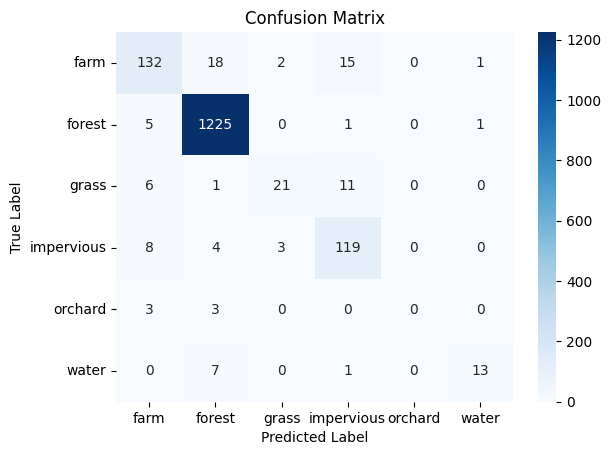

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt 

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=label_encoder.classes_,
yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
'C': [0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(LogisticRegression(
multi_class='ovr',
solver='liblinear',
penalty='l1',
random_state=42,
max_iter=1000
), param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

Best parameters: {'C': 10}
Best cross-validation score: 0.9554680887492232


In [16]:
test_data = pd.read_csv("/kaggle/input/first-hackathon/hacktest.csv")
test_data.shape


(2845, 29)

In [17]:
test_data[ndvi_columns] = test_data[ndvi_columns].interpolate(axis=1)
test_data[ndvi_columns] = test_data[ndvi_columns].fillna(method='bfill', axis=1)
test_data[ndvi_columns] = test_data[ndvi_columns].fillna(method='ffill', axis=1)

In [18]:
window_size = 3
test_data[ndvi_columns] = test_data[ndvi_columns].rolling(window=window_size, axis=1).mean().fillna(method='bfill', axis=1).fillna(method='ffill', axis=1)

In [19]:
test_data['NDVI_mean'] = test_data[ndvi_columns].mean(axis=1)
test_data['NDVI_median'] = test_data[ndvi_columns].median(axis=1)
test_data['NDVI_std'] = test_data[ndvi_columns].std(axis=1)
test_data['NDVI_max'] = test_data[ndvi_columns].max(axis=1)
test_data['NDVI_min'] = test_data[ndvi_columns].min(axis=1)
test_data['NDVI_range'] = test_data['NDVI_max'] - test_data['NDVI_min']

In [20]:
X_test = test_data.drop(columns=['Unnamed: 0', "ID"] + list(ndvi_columns))

In [21]:
X = df.drop(columns=["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
X_test_scaled = scaler.fit_transform(X_test)

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Optional: Split for local testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Align columns if needed
X_test = X_test[X_train.columns]  # Make sure test matches train

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict
predictions = model.predict(X_test_scaled)

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.62625


In [25]:
print(f"Number of predictions: {len(predictions)}")
print(f"Number of test samples: {len(test_data)}")

Number of predictions: 1600
Number of test samples: 2845


In [26]:

X_test = test_data.drop(columns=['Unnamed: 0', 'ID'] + list(ndvi_columns), errors='ignore')

In [27]:
print(X_test.shape)

(2845, 6)


In [28]:
print(predictions.shape)


(1600,)


In [29]:
predictions = model.predict(X_test_scaled) # X_test_scaled should have the correct number of rows
predicted_classes = label_encoder.inverse_transform(predictions) # Make sure the label_encoder is fitted correctly

In [30]:

#submission = pd.DataFrame({
#'ID': X_test ['ID'], # Use test_data to access the 'ID' column
#'PredictedClass': label_encoder.inverse_transform(predictions) # Convert encoded labels back to original class names
#})


#submission.to_csv('submission.csv', index=False)


#print(submission.head())

In [31]:
predictions = model.predict(X_test_scaled)

In [32]:
#y_test = model.predict(test_data)

In [33]:
y_test

2215    1
2582    1
1662    1
3027    1
4343    1
       ..
1079    1
7979    4
1115    1
6093    1
6832    0
Name: class, Length: 1600, dtype: int64

In [34]:
y_decoded = label_encoder.inverse_transform(y_test)
y_decoded

array(['forest', 'forest', 'forest', ..., 'forest', 'forest', 'farm'],
      dtype=object)

In [35]:
#result = pd.DataFrame({
#    'ID': ID,
#    'class': y_decoded
#})

In [36]:
#result

In [37]:
#result.to_csv("submission.csv", index=False) #this file will appear under the output section of the right navbar. You need to submit this csv file